# Air Pollution in Bangalore: Air Quality Index

*** Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.


In [2]:
df=pd.read_csv('Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null int64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    730 non-null float64
dtypes: float64(8), int64(1)
memory usage: 51.5 KB


* T	Average Temperature (°C)
* TM	Maximum temperature (°C)
* Tm	Minimum temperature (°C)
* SLP	Atmospheric pressure at sea level (hPa)
* H	Average relative humidity (%)
* VV	Average visibility (Km)
* V	Average wind speed (Km/h)
* VM	Maximum sustained wind speed (Km/h)
* PM 2.5	Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. 
##### Target PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.

In [4]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum().sum()

0

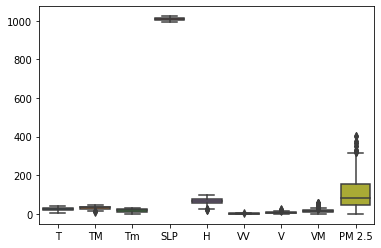

In [6]:
sns.boxplot(data=df)

In [7]:
X=df.iloc[:,:-1] # independent variables
y=df.iloc[:,-1] #target vaiable PM 2.5
X.shape
y.shape


(730,)

# Feature Importance
#### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2


In [9]:
print(model.feature_importances_)

[0.1545 0.1096 0.2193 0.094  0.0849 0.2452 0.0539 0.0387]


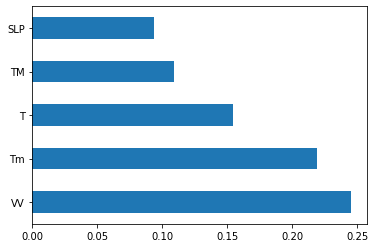

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

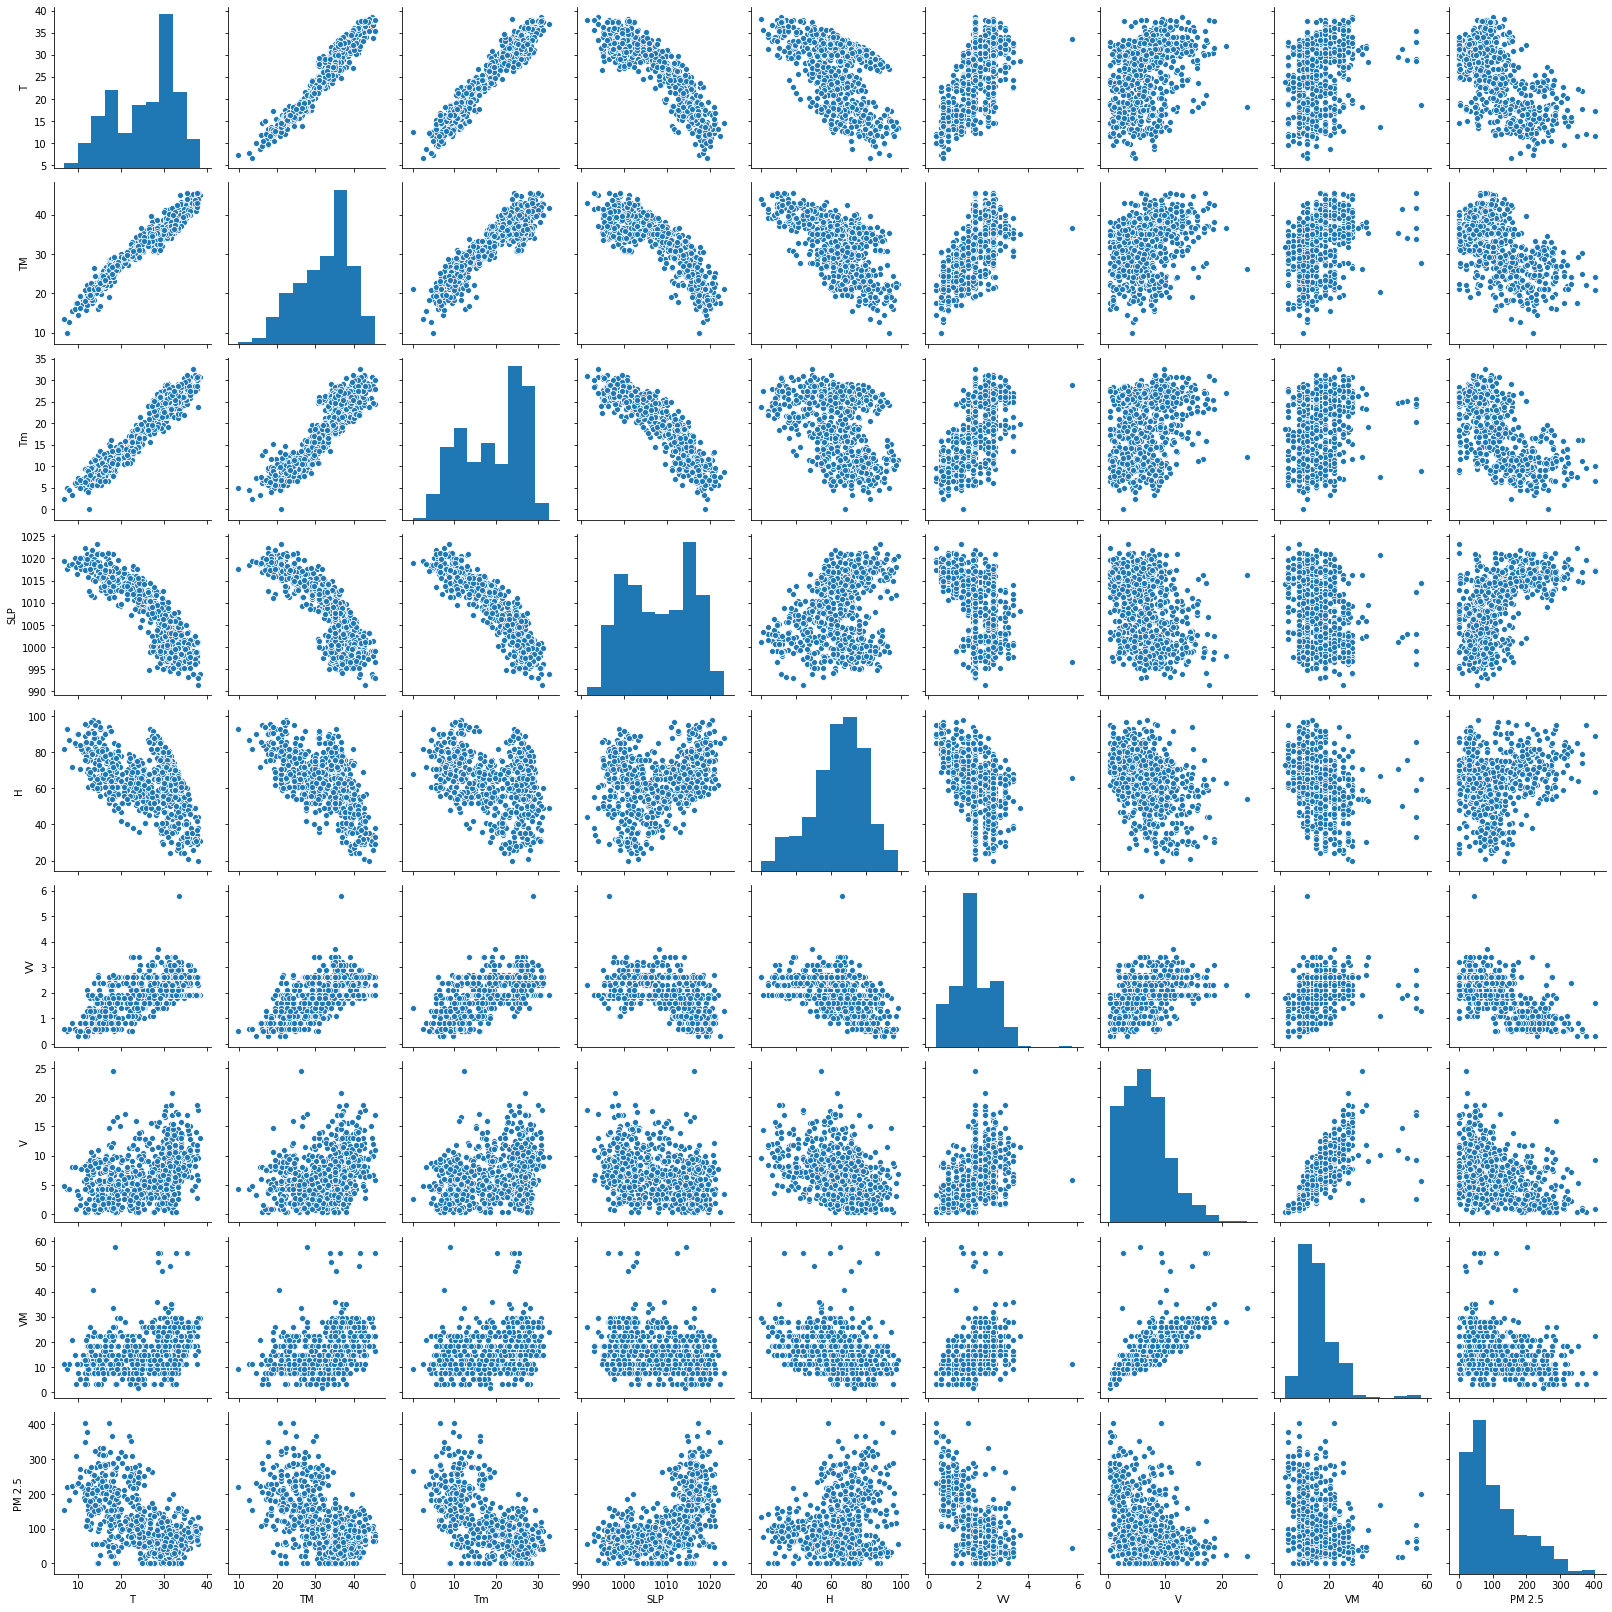

In [11]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

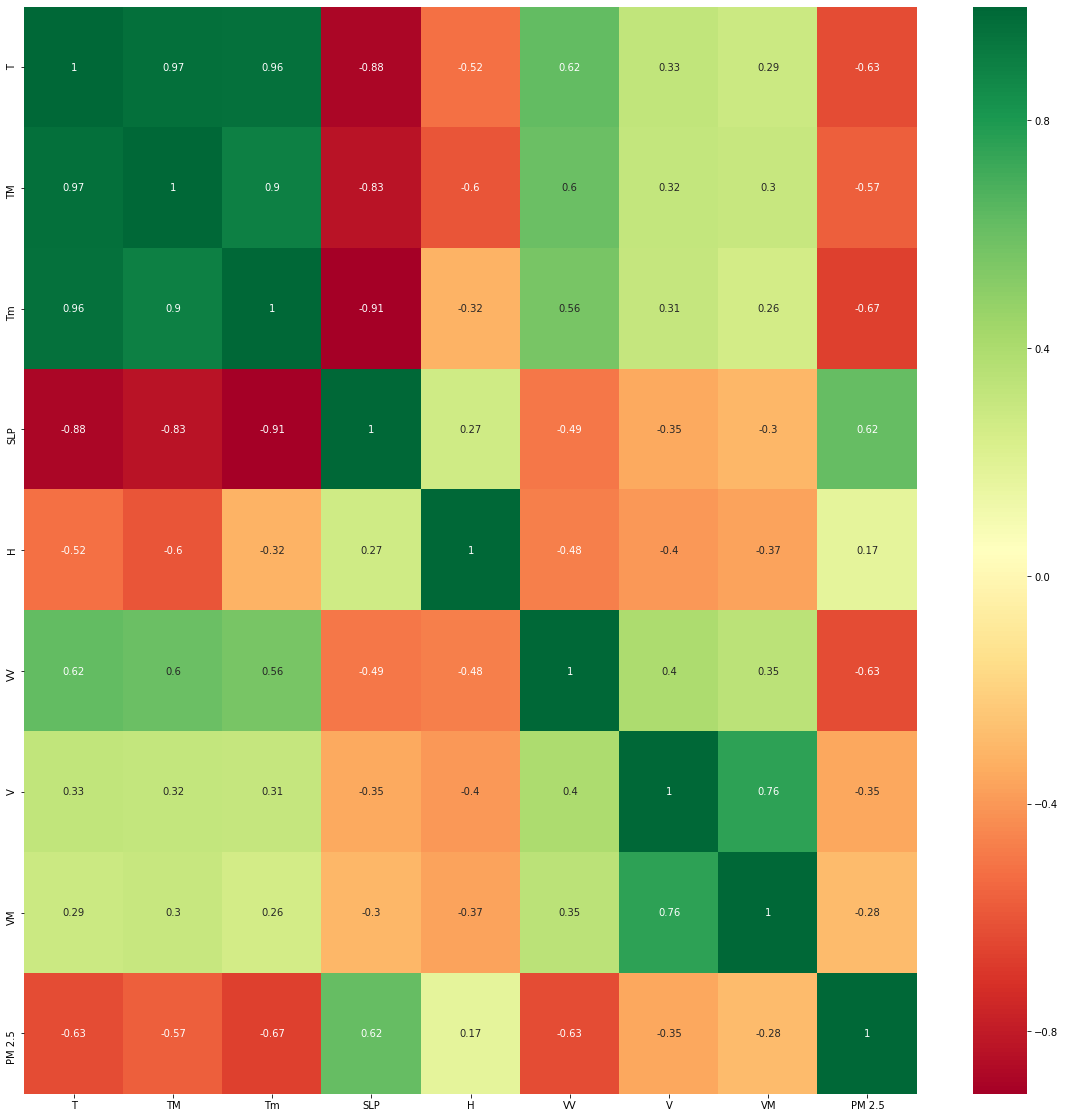

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


Obervation: when atmospheric pressure at sea level(SLP) is increasing probability of around 61% increase in particulate matter (PM2.5), also when humidity increases probability of 17% increase in PM 2.5.  These two attributes have positive correlation with target

There are negative correlation with avg, min, max tempreture, wind spead and visibility similutenously. When visibility is increasing there is around 62% of particulate matter decreasing, also when minimum tempreture is increasing probality of 66% decrease in particulate matter

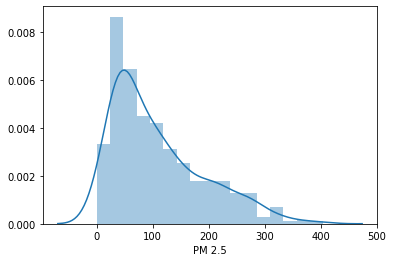

In [14]:
sns.distplot(y)  # cheking the distribution of target.  It is skewed

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=2)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

y_train = y_train.astype('float')
#Y_validator = Y_validation.astype('float')

The Shape of X_TRAIN is (511, 8)
The Shape of X_TEST is (219, 8)
The Shape of Y_TRAIN is (511,)
The Shape of Y_TEST is (219,)


In [16]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("co-efficient of determination R^2 on training set: {}".format(regressor.score(X_train, y_train)))

co-efficient of determination R^2 on training set: 0.5520592736787298


In [18]:
print("co-efficient of determination R^2 on test set: {}".format(regressor.score(X_test, y_test)))

co-efficient of determination R^2 on test set: 0.6420600695529249


In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y, cv=5)
print (score.max())  # out of 5 the max score

0.6414879730088029


In [20]:
#prediction on test data.
y_pred = regressor.predict(X_test)

In [21]:
#Now compare the actual output values for X_test with the predicted values, execute the following script:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df2 = df1.head(25)
print(df2)

         Actual   Predicted
671   64.916667   21.923517
200  322.250000  188.573360
77    38.666667   59.238893
226  109.458333  125.446441
37    59.208333   91.112059
250  198.875000  104.554565
504   43.500000   54.467444
198  214.125000  164.800082
346  257.666667  188.665035
398   79.291667  134.426327
372  231.250000  220.570197
22   127.708333  129.150435
328   70.708333   84.990041
637   90.708333   -6.610381
68   106.500000  107.856114
233   89.875000  107.842993
210  218.666667  220.982363
436   48.500000   58.504433
577  122.500000   70.125563
446   25.458333   87.848243
658   41.375000   56.298763
172  185.958333  200.299090
241  137.875000  136.442328
15   332.708333  222.580800
30    21.208333  115.858932


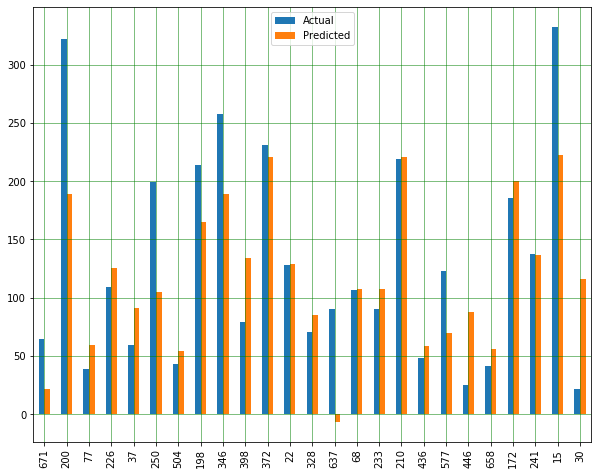

In [22]:
#The comparison plot of Actual and Predicted values
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred)

print("Results of metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of metrics:
MAE: 37.25321114967527
MSE: 2563.6135343232977
RMSE: 50.63213934175898
R-Squared: 0.6420600695529249


Regression accuracy metrics
* The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [24]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
T,0.140890
TM,0.761489
Tm,-6.051473
SLP,-0.164359
H,-0.916754
VV,-46.684074
V,-1.786620
VM,-0.212971


observations: 
*when all other attributes are constant, 1 unit increase in TM(max.tempreture) will have probablity increase of .76 on target PM 2.5.
*subsequently when all other features are constant, 1 unit increase in VV (avg. visibility) will probabally decrease .46 on PM2.5

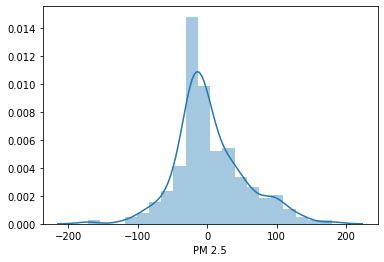

In [25]:
sns.distplot(y_test-y_pred)  # difference between y test and y pred is almost normally distributed

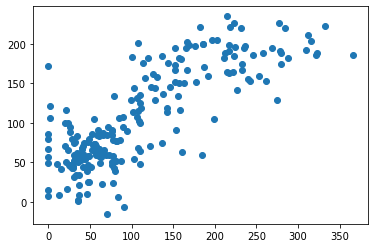

In [26]:
plt.scatter(y_test, y_pred)

# selecting the best regression model 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor #(random_state=42,silent=True)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor(silent=True))) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [29]:
from sklearn.model_selection import KFold
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state='seed')
    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -3090.450639 (595.993943)
LASSO: -3080.823275 (597.788222)
RIDGE: -3090.002264 (595.820284)
EN: -3333.155981 (660.190131)
KNN: -3884.110476 (935.326663)
DT: -3997.985157 (996.717877)
SVR: -7260.496185 (2579.271357)
ADA: -3194.297351 (574.571608)
RF: -2567.368737 (536.717664)
XGB: -2549.447097 (628.137710)


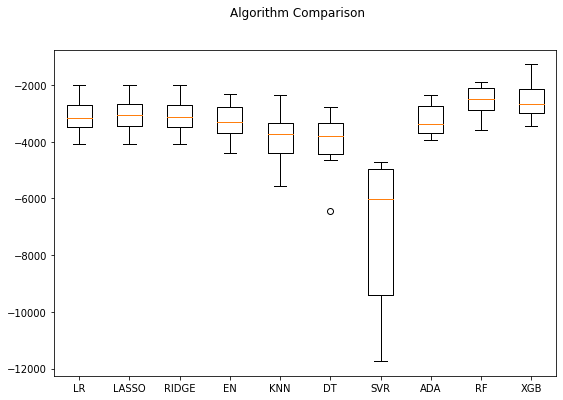

In [30]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

In [31]:
import pickle

In [32]:
with open ('d', 'wb')as f:
           pickle.dump(regressor,f)

In [33]:
# open a file, where  can store the data
#file = open('regression_model.pkl', 'wb')

# dump information to that file
#pickle.dump(regressor, file)
#file.close()

In [34]:
with open ('d', 'rb')as f:
    b=pickle.load(f)

In [35]:
b.predict(X_test)

array([ 21.9235, 188.5734,  59.2389, 125.4464,  91.1121, 104.5546,
        54.4674, 164.8001, 188.665 , 134.4263, 220.5702, 129.1504,
        84.99  ,  -6.6104, 107.8561, 107.843 , 220.9824,  58.5044,
        70.1256,  87.8482,  56.2988, 200.2991, 136.4423, 222.5808,
       115.8589,  51.3911,  65.7242, 150.1284,  60.6724,  65.1144,
        58.3236, 143.9835, 199.6907,  46.8425, 142.0538,  66.7156,
        64.547 , 151.3997, 106.4011,  79.631 ,  89.2258,  55.3448,
       104.7116, 201.6186,  67.7544,  34.4542,   7.9084, 151.496 ,
        72.3829,  90.8202,  59.1129, 174.9993,  46.0403, 119.3117,
        41.8636, 113.8625, 221.969 ,  47.7072, -15.4802,  24.0232,
       143.541 , 185.0582,  99.2663,  65.7738, 115.2302, 187.9869,
       181.6907,  60.9554,  84.0547, 184.2695, 155.6302,  57.4215,
       186.2104,  51.1914,  45.8135,  44.8796, 195.0444, 220.7799,
        70.9605,   6.1142,  71.0177,  67.2149,  10.366 ,  42.6532,
        44.1472,  94.1837,  67.4681,  57.0305,  56.982 ,   2.6

In [36]:
X_train.head()

,T,TM,Tm,SLP,H,VV,V,VM
165,18.2,28.1,10.4,1012.6,61,1.8,2.6,11.1
574,17.4,24.4,10.1,1018.9,61,2.3,6.1,11.1
268,30.3,41.1,22.7,997.7,62,2.6,16.7,29.4
552,14.9,22.8,8.0,1018.4,73,1.1,5.9,13.0
237,27.0,37.2,22.6,1009.8,49,1.9,15.6,27.8


# Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dtree=DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
print ('the coefficient of determination i.e R^2 for training set : {}'.format(dtree.score(X_train, y_train)))

the coefficient of determination i.e R^2 for training set : 1.0


In [40]:
print ('the coefficient of determination i.e R^2 for test set : {}'.format(dtree.score(X_test,y_test)))

the coefficient of determination i.e R^2 for test set : 0.3016915850113644


Obervation: The is overfit as the R^2 value for training set is 100% but bad as 34% on test set. we can achieve better with hyper parameter tuning

In [41]:
dtree_pred = dtree.predict(X_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, dtree_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))
r2 = metrics.r2_score(y_test, dtree_pred)
print("R-Squared:", r2)

MAE: 47.184703195643834
MSE: 5001.378028879664
RMSE: 70.72042158301706
R-Squared: 0.3016915850113644


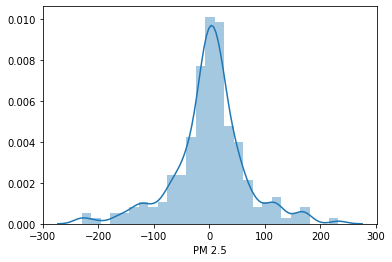

In [33]:
sns.distplot(y_test-dtree_pred)  # difference between y test and y pred is almost normally distributed

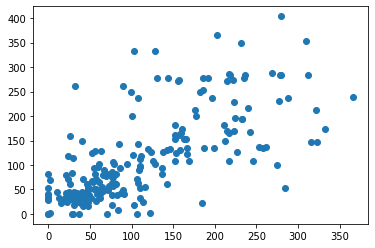

In [34]:
plt.scatter(y_test,dtree_pred)

# Hyper parameter tuning for Decision Tree Regressor with Grid Search CV

In [43]:
DecisionTreeRegressor() # shift+tab, there are many parameters.  
#go to + in right corner to scroll down to see the different measures of parameter tuning
# (best possible values can be used as parameter)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
# creating a key dictionary pair using the parameters of DecisionTreeRegressor
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]}

In [45]:
# hyperparameter tuning using grid search cv
from sklearn.model_selection import GridSearchCV  # gridsearch takes longer time compared to random search cv
Grid_Search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [46]:
# defining the timer function to check the time consumed to run grid search cv
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [47]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
Grid_Search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 523 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 2089 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 4777 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 8233 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 12457 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 17449 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 23209 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 29737 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 37033 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 45097 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 53929 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 63529 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 73897 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 84865 t

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,

In [48]:
Grid_Search.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [49]:

Grid_Search.best_score_

-3215.1437548754348

In [50]:
predictions=Grid_Search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
r2 = metrics.r2_score(y_test, predictions)
print("R-Squared:", r2)



MAE: 37.59767511460194
MSE: 2629.6544949688646
RMSE: 51.28015693198359
R-Squared: 0.6328392191620051


# Hyper parameter tuning for Decision Tree Regressor with Random Search CV

In [51]:
# hyperparameter tuning using random search cv
from sklearn.model_selection import RandomizedSearchCV  #  random search takes less time compared to grid search cv


In [52]:
random_search=RandomizedSearchCV(dtree,param_distributions=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [53]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [54]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s



 Time taken: 0 hours 0 minutes and 5.91 seconds.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


In [55]:
random_search.best_params_


{'splitter': 'best',
 'min_weight_fraction_leaf': 0.1,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 70,
 'max_features': None,
 'max_depth': 5}

In [56]:

random_search.best_score_

-3588.979114138368

In [57]:
rand_predictions=random_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rand_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rand_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rand_predictions)))
r2 = metrics.r2_score(y_test, rand_predictions)
print("R-Squared:", r2)

MAE: 35.381360060363534
MSE: 2494.8319893081343
RMSE: 49.94829315710532
R-Squared: 0.6516635691089798


* Random Search has taken less time and has given better results compared to Grid Search CV

In [58]:
import pickle

In [59]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

# Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [61]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scld = scaler.transform(X_train)
X_test_scld = scaler.transform(X_test)

In [62]:
RFregressor = RandomForestRegressor(n_estimators=200, random_state=0)
RFregressor.fit(X_train_scld, y_train)
RFy_pred = RFregressor.predict(X_test_scld)


In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RFy_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RFy_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))
print("R-Squared:", metrics.r2_score(y_test, RFy_pred))

Mean Absolute Error: 34.0186766553589
Mean Squared Error: 2132.525656002649
Root Mean Squared Error: 46.17927734387632
R-Squared: 0.7022499394833006


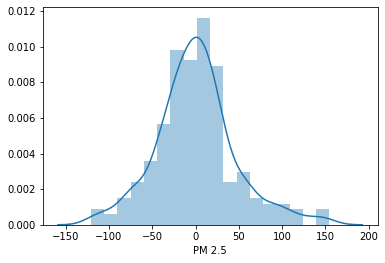

In [61]:
sns.distplot(y_test-RFy_pred) # difference between y test and random forest y pred distribution. almost normal dist

In [64]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)  #n_jobs (default=None)The number of jobs to run in parallel.
# If set to -1, all CPUs are used (means using all processors)

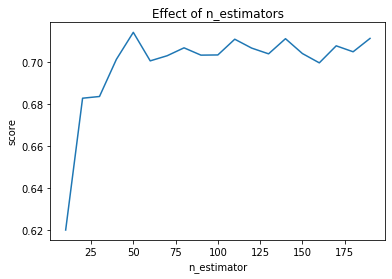

In [63]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train_scld, y_train)
    scores.append(model.score(X_test_scld, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [64]:
scores

[0.6199105574757723,
 0.682757446769806,
 0.6835689037459682,
 0.7012956087341847,
 0.7141627449203323,
 0.7005605264819573,
 0.7029993423019407,
 0.7067755384283186,
 0.7032911763464734,
 0.7033818518348118,
 0.7108836978587117,
 0.706648730737922,
 0.7039139904540253,
 0.7111302130419179,
 0.7040561292548972,
 0.6996138392854166,
 0.7077314669783974,
 0.7048938336913464,
 0.7112702820484722]

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9218179918251916


In [67]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6754666794211939


In [68]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.45774038036615217

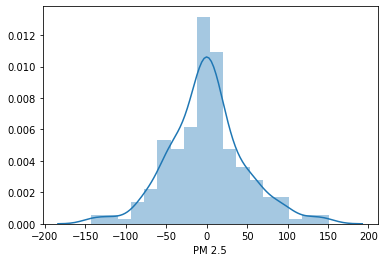

In [72]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

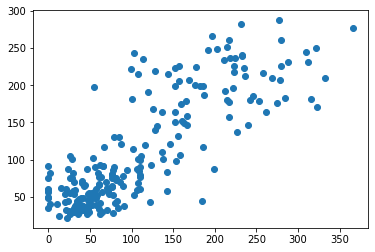

In [73]:

plt.scatter(y_test,prediction)

# XGBOOST Regressor

In [73]:
import xgboost as xgb
regressor=XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboo
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [74]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8424408118004397


In [75]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7307656069383998


In [76]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.5408681605476948

# Hyperparameter tuning

In [77]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [78]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [79]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [80]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor(silent=True) # to silent the WARNING: C:/Jenkins/workspace/xgboost

In [81]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [82]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.4s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.0s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_e

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   2.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subs

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.2min finished
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [83]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [84]:
xg_random.best_score_

-2656.2182339163196

In [85]:


predictions=xg_random.predict(X_test)

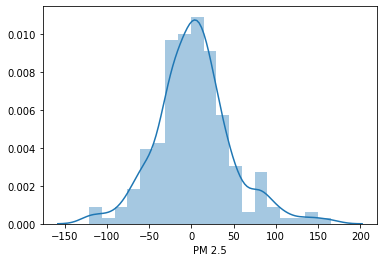

In [46]:

sns.distplot(y_test-predictions)

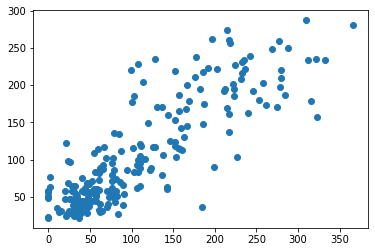

In [47]:
plt.scatter(y_test,predictions)

In [86]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R-Squared:", metrics.r2_score(y_test, predictions))

MAE: 33.067709913284105
MSE: 2025.0379384170694
RMSE: 45.00042153599308
R-Squared: 0.7172577187922257


In [87]:
# open a file, where we want to store the data
file = open('xgboost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump('xgboost_regression_model.pkl', file)

* overall XGBoost with Random Grid Search CV has given better results compared to other models